<h1>Importing Libraries and Reading Data

In [43]:
import numpy as np
import pandas as pd

In [44]:
data = pd.read_csv("breast_cancer.xls")
data = data.values
x = data[:, 2:]
y = data[:, 1:2]

<h1>Encoding M/B as 1/0 where 1 means Malignant and 0 means Benign

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("", OneHotEncoder(), [0])], remainder="passthrough")
y = ct.fit_transform(y)
y = y[:, 1]

<h1>Splitting into Training and Testing Dataset

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)


<h1>Creating Regression Model

In [47]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression(max_iter= 2377)
model.fit(x_train, y_train)

/home/arv/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2377)

<h1>Standard Prediction Score

In [48]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("Train score:", accuracy_score(y_train, y_train_pred))
print("Test score:", accuracy_score(y_test, y_test_pred))


Train score: 0.9648351648351648
Test score: 0.9649122807017544


<h1>Trying to find the best possible accuracy for the model by changing the threshold value

Best accuracy of 0.9648351648351648 at threshold 0.46530000000000005


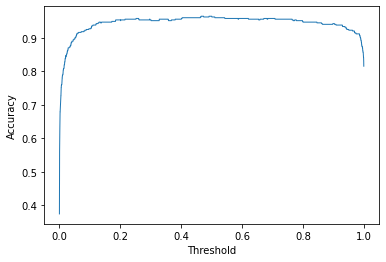

In [49]:
import matplotlib.pyplot as plt
probs = model.predict_proba(x_train)
thresholds = np.arange(0, 1, 0.0001)
accuracies = []
max_accuracy = 0
best_threshold = 0
for t in thresholds:
  pred = (probs[:, 1]>t).astype(int)
  accuracy = accuracy_score(y_train, pred)
  if accuracy>max_accuracy:
    max_accuracy = accuracy
    best_threshold = t
  accuracies.append(accuracy)
plt.plot(thresholds, accuracies, linewidth=1)
plt.ylabel("Accuracy")
plt.xlabel("Threshold")
print("Best accuracy of", max_accuracy, "at threshold", best_threshold)


<h2>got a negligible accuracy boost by changing threshold to 0.4653 (default is 0.5)
<h1>Using the obtained threshold to get new score on testing data

In [50]:
probs = model.predict_proba(x_test)
pred = (probs[:, 1] > best_threshold).astype(int)
accuracy = accuracy_score(y_test, pred)
print("Accuracy score with improved threshold:", accuracy)

Accuracy score with improved threshold: 0.9649122807017544


<h2>No significant change to the accuracy of the model as the best calculated threshold 0.4653 is quite close to the default threshold of 0.5